In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


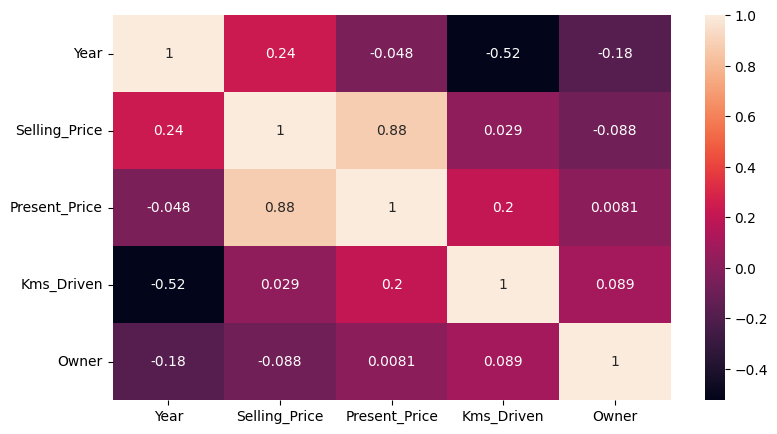

In [7]:
sns.heatmap(df.corr(), annot= True);

In [8]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [9]:
df["vehicle_age"] = 2023-df.Year

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [11]:
df.drop(columns = ["Car_Name", "Year"], inplace = True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [13]:
df = pd.get_dummies(df, drop_first = True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


## Train | Test Split

In [15]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modelling

In [17]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [18]:
DT_model = DecisionTreeRegressor(random_state=101)

In [19]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [20]:
y_pred = DT_model.predict(X_test)
y_train_pred = DT_model.predict(X_train)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [23]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.0,0.942589
mae,0.0,0.704754
mse,0.0,1.540966
rmse,0.0,1.241356


In [24]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2',
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.881430
test_neg_mean_absolute_error       -0.828375
test_neg_mean_squared_error        -2.846157
test_neg_root_mean_squared_error   -1.606324
dtype: float64

## Feature Importance

In [25]:
DT_model.feature_importances_

array([8.97152719e-01, 1.76820219e-02, 0.00000000e+00, 8.10505631e-02,
       6.15555338e-04, 1.58965401e-03, 1.03684467e-04, 1.80580261e-03])

In [26]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_,
                     columns = ["feature Importance"]).sort_values("feature Importance")
df_f_i

,feature Importance
Owner,0.000000
Seller_Type_Individual,0.000104
Fuel_Type_Diesel,0.000616
Fuel_Type_Petrol,0.001590
Transmission_Manual,0.001806
Kms_Driven,0.017682
vehicle_age,0.081051
Present_Price,0.897153


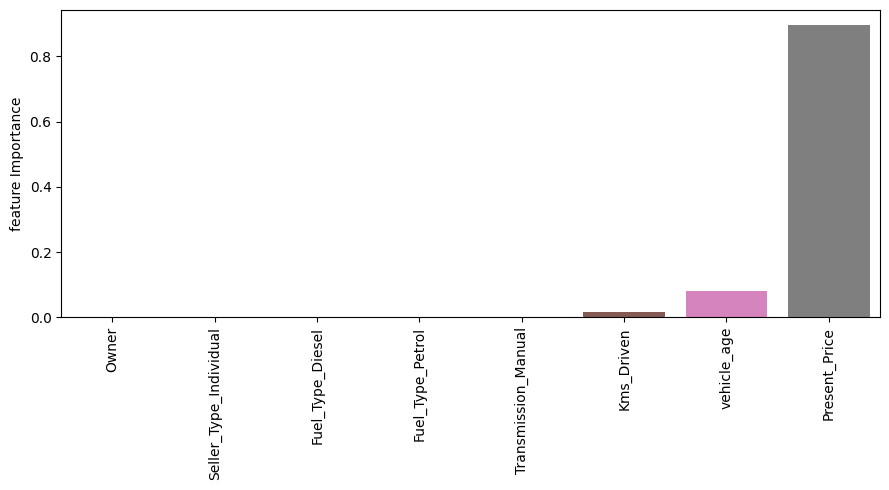

In [27]:
sns.barplot(x=df_f_i.index, y = "feature Importance", data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Visualizing Trees

In [28]:
from sklearn.tree import plot_tree

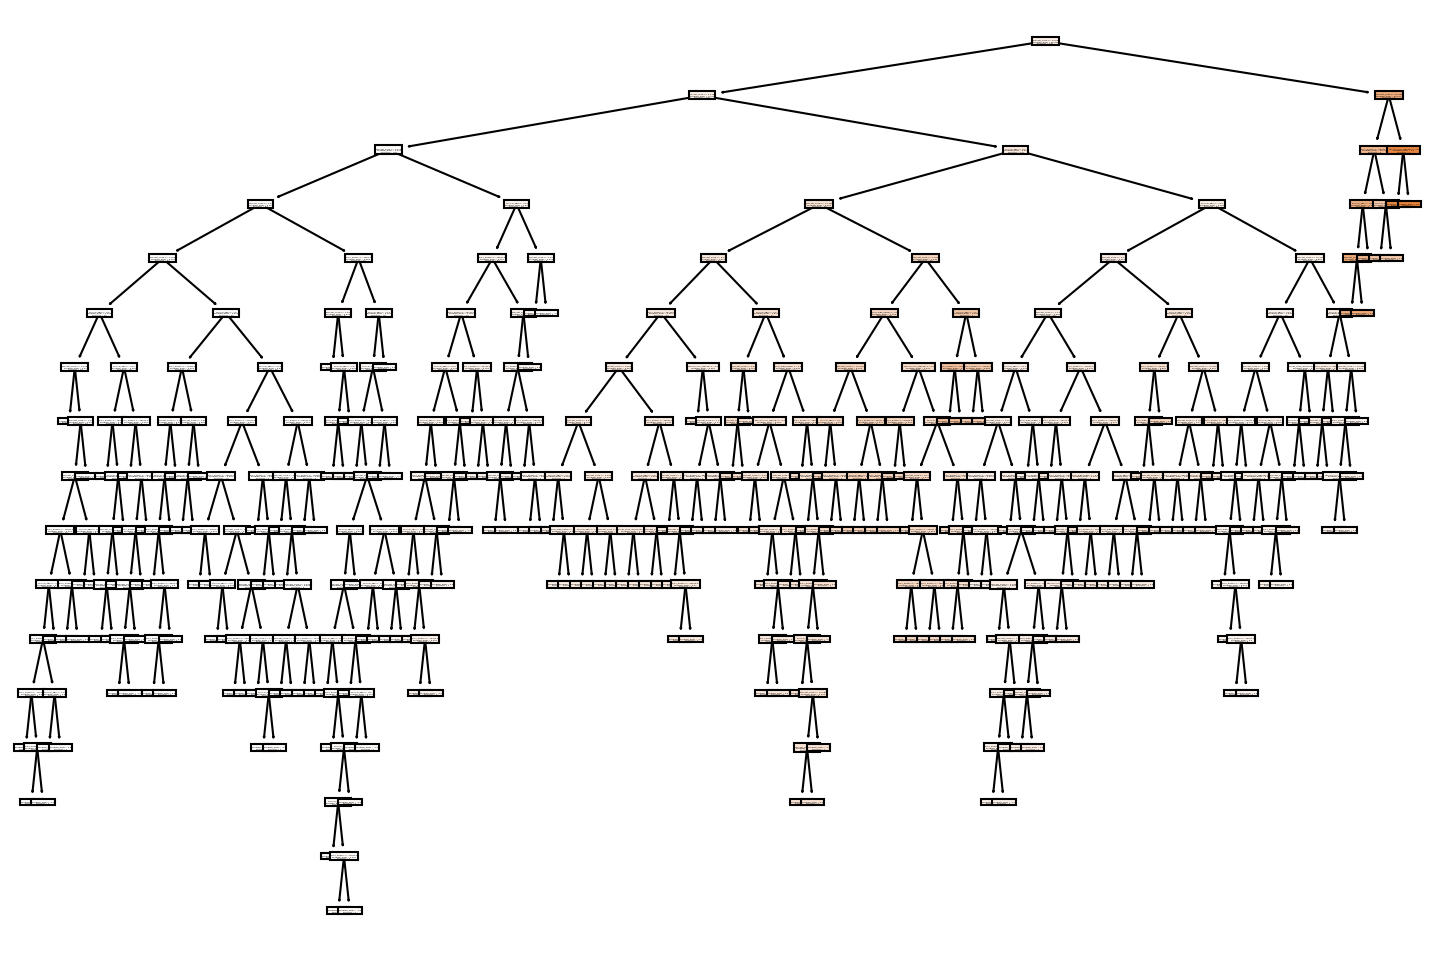

In [29]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(DT_model, filled=True, feature_names=X.columns);
plt.show()

In [30]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, fontsize=10);

In [31]:
pruned_tree = DecisionTreeRegressor(max_depth=3, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=101)



         train      test
R2    0.871127  0.783878
mae   1.105847  1.540649
mse   3.277820  5.800869
rmse  1.810475  2.408499




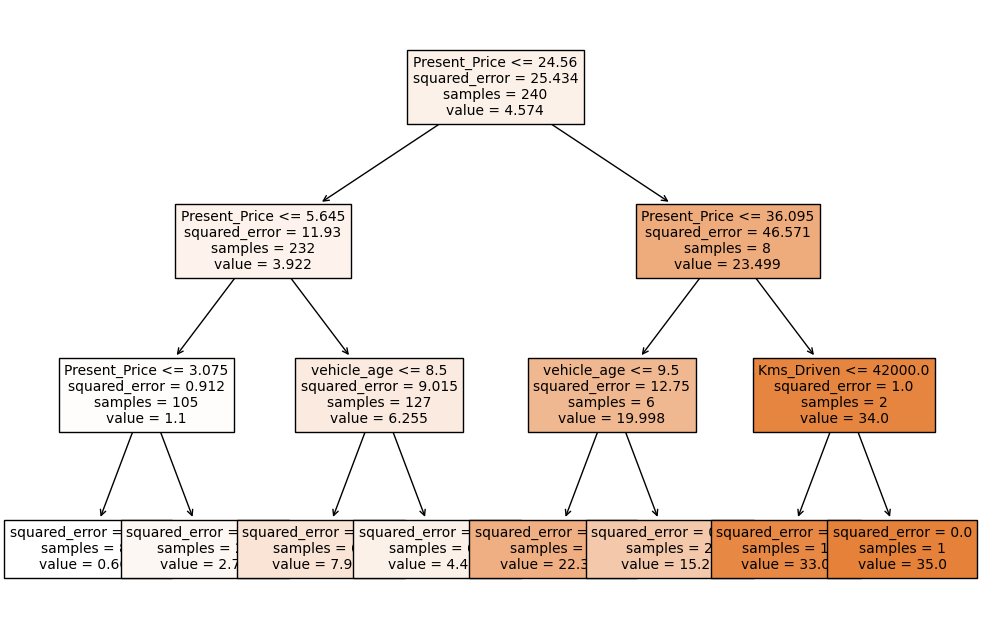

In [32]:
report_model(pruned_tree)
plt.show()

## Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
model = DecisionTreeRegressor(random_state=101)

In [39]:
param_grid = {"splitter":["best", "random"],
            "max_depth": [None, 4, 5, 6, 7,8,9,10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
             "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [40]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [41]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [42]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=7, random_state=101)

In [44]:
grid_model.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'best'}

In [45]:
grid_score = pd.DataFrame(grid_model.cv_results_)
grid_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013055,0.004380,0.005698,0.002905,None,1,2,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.884873,-1.109968,-1.560195,-0.768519,-3.661578,-0.855804,-2.462645,-1.135945,-1.340881,-0.923418,-1.470383,0.869760,9
1,0.008709,0.002874,0.007571,0.003902,None,1,2,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.923490,-0.775427,-3.512334,-1.591926,-2.145708,-1.001497,-3.557253,-0.841655,-0.398649,-6.202618,-2.095056,1.733007,431
2,0.011908,0.002935,0.006485,0.003660,None,1,3,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.868025,-1.166010,-1.555224,-0.764768,-3.669531,-0.893783,-2.493841,-1.150770,-1.381815,-0.907673,-1.485144,0.871849,12
3,0.011950,0.005635,0.005237,0.001453,None,1,3,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-6.897430,-1.142804,-2.705761,-1.125360,-2.567831,-2.175479,-3.904847,-0.828821,-0.997053,-4.238386,-2.658377,1.817077,711
4,0.009245,0.002069,0.004790,0.000869,None,1,5,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.784587,-1.059755,-2.109169,-0.744268,-3.660894,-0.962344,-2.662130,-1.065130,-1.322418,-0.917490,-1.528818,0.922420,15
5,0.011620,0.005899,0.008093,0.004434,None,1,5,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-1.240390,-1.148949,-2.828630,-1.741955,-3.588684,-2.165832,-3.385514,-1.122575,-1.348627,-6.489925,-2.506108,1.591154,683
6,0.012997,0.008009,0.005603,0.003796,None,1,6,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.655147,-1.262552,-3.539843,-0.699470,-3.633202,-1.073780,-3.146107,-1.032690,-1.306700,-0.958924,-1.730842,1.141467,52
7,0.008372,0.002192,0.004815,0.001620,None,1,6,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.663536,-1.317728,-3.126575,-1.709144,-0.897274,-1.580253,-3.356449,-1.124097,-0.540088,-6.469341,-2.078449,1.721905,420
8,0.014436,0.006132,0.009993,0.007640,None,1,7,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.692478,-1.252800,-3.539136,-0.695838,-1.116187,-1.001527,-2.685655,-0.994064,-1.301957,-3.183532,-1.646317,1.011677,32
9,0.014487,0.010460,0.012019,0.009155,None,1,7,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-9.028223,-1.411968,-3.128591,-1.441484,-1.206118,-1.000492,-3.246923,-0.809372,-0.441792,-3.440157,-2.515512,2.403613,687


In [47]:
grid_model.best_index_

302

In [51]:
grid_model.best_score_

-1.4096661789372227

In [54]:
y_train_pred = grid_model.predict(X_train)
y_pred = grid_model.predict(X_test)

In [55]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.971356,0.930021
mae,0.481615,0.738078
mse,0.728537,1.878304
rmse,0.853544,1.370512


In [56]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101,max_depth = 6, min_samples_split= 7)
scores = cross_validate(model, X_train, y_train, scoring=['r2',
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.893220
test_neg_mean_absolute_error       -0.792517
test_neg_mean_squared_error        -2.818985
test_neg_root_mean_squared_error   -1.409666
dtype: float64

In [58]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [59]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
267,8.35,7.188235,1.161765
50,14.90,19.998333,-5.098333
174,0.38,0.437143,-0.057143
163,0.45,0.525455,-0.075455
216,2.90,2.860000,0.040000
194,0.20,0.525455,-0.325455
282,8.25,7.987500,0.262500
196,0.17,0.234667,-0.064667
98,7.05,5.825000,1.225000
176,0.35,0.525455,-0.175455


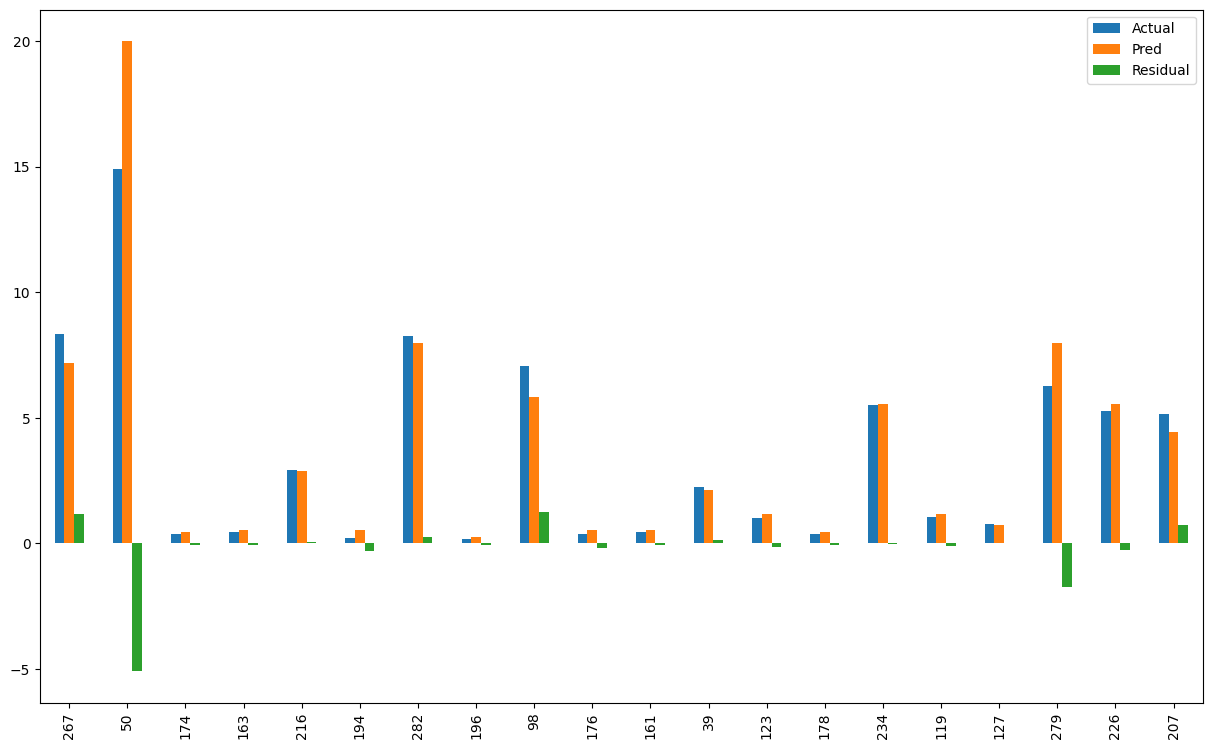

In [60]:
comp_sample.plot(kind = "bar", figsize = (15, 9))
plt.show()

In [63]:
## The End